<!DOCTYPE html>
<html>
<body>
    <h1 style="text-align: center;">
        <strong>⚛️Explicable AI: Superconductivity data</strong>
    </h1>
</body>
</html>


<!DOCTYPE html>
<html>
<body>
    <h3 style="text-align: center;">
     📈 <strong> Linear Regression & Feature Importance </strong>
    </h3>
</body>
</html>

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>📚Importing Libraries</strong>
    </h3>
</body>
</html>

In [489]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm
from scipy.stats import f
from scipy.stats import expon

from pygam import GammaGAM, s, te

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression

***

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>🏋🏻Training the model: OLS</strong>
    </h3>
</body>
</html>

A linear regression can be write as:

$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n + \epsilon
$$

where:
* $\beta_0$: Intercept
* $\beta_i$: Coefficients
* $\epsilon$: Error

The ideal weight for each coefficient is estimed using the Ordinary Least Squares (OLS):

$$
\hat{B} = arg min_{\beta_0, \cdots, \beta_p} \sum_{i=i}^{n} (y^{(i)} - (\beta_0 + \sum_{j=1}^{p} B_j X_j^{(i)}))^2
$$

In [428]:
df = pd.read_csv("dataset_supercondutividade.csv")
display(df)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [429]:
X = df.drop(["critical_temp"], axis=1)
y = df["critical_temp"]

In [430]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.9, random_state=1702)

In [431]:
model = sm.OLS(y_train, X_train)

lr = model.fit()

In [432]:
y_predicted = lr.predict(X_test)

***

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>🧪Interpretation methods</strong>
    </h3>
</body>
</html>

**Summary**

In [433]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:          critical_temp   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              1563.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):                        0.00
Time:                        10:34:51   Log-Likelihood:                         -82020.
No. Observations:               19137   AIC:                                  1.642e+05
Df Residuals:                   19056   BIC:                                  1.648e+05
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

**Analysis of Residuals**

In [434]:
residuals = y_test - y_predicted

In [435]:
d_residuals = {
    "Real Value": y_test,
    "Predicted Value": y_predicted,
    "Residuals": residuals
}
df_residuals = pd.DataFrame.from_dict(d_residuals)
display(df_residuals)

,Real Value,Predicted Value,Residuals
7112,62.000,64.178622,-2.178622
4456,57.400,56.803166,0.596834
1943,59.000,63.681013,-4.681013
8853,10.200,25.710996,-15.510996
21215,6.200,11.803963,-5.603963
...,...,...,...
7270,58.500,68.445391,-9.945391
21168,2.100,1.160350,0.939650
13381,4.505,16.873915,-12.368915
6874,17.000,30.964255,-13.964255


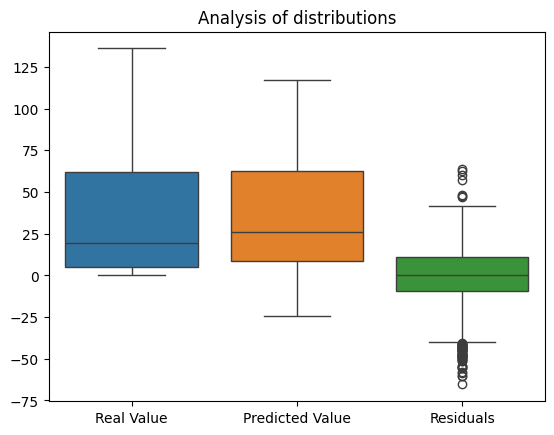

In [436]:
sns.boxplot(df_residuals);
plt.title("Analysis of distributions")
plt.show()

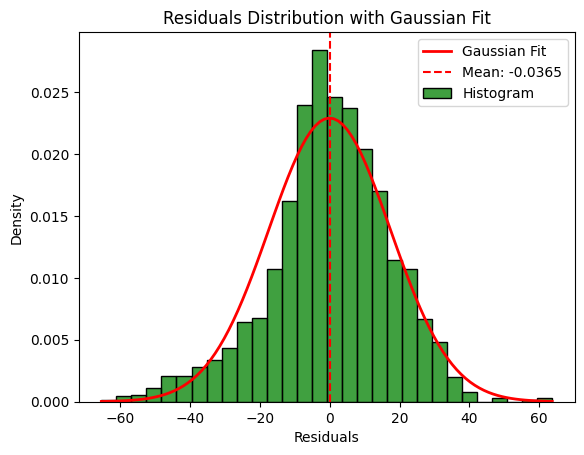

In [437]:
eixo = sns.histplot(df_residuals["Residuals"], color='green', stat="density", bins=30, label="Histogram")

mean = np.mean(df_residuals["Residuals"])
std_dev = np.std(df_residuals["Residuals"], ddof=1) 

x = np.linspace(min(df_residuals["Residuals"]), max(df_residuals["Residuals"]), 100)

pdf_fitted = stats.norm.pdf(x, loc=mean, scale=std_dev)

plt.plot(x, pdf_fitted, 'r-', lw=2, label="Gaussian Fit")

plt.axvline(mean, color='r', linestyle='dashed', label=f'Mean: {round(mean, 4)}')

plt.legend()
plt.title("Residuals Distribution with Gaussian Fit")
plt.xlabel("Residuals")
plt.ylabel("Density")

plt.show()


* The means of the real and predicted values are similar. Furthermore, the mean of the residuals is close to 0, indicating that the model is not overfitting (more random error).
* Comparing the real values with the predicted values, it is possible to say that the distributions between the second and third quartiles are similar.
* Real values exhibit greater range for higher temperatures, while in the predicted values, the first and fourth quartiles have closer sizes (There are negative temperature values).
* There are some outliers in the residuals, likely related to higher temperature values, which were not fully captured by the linear model. However, as expected, the residual distribution follows a normal distribution, with mean equal to 0.

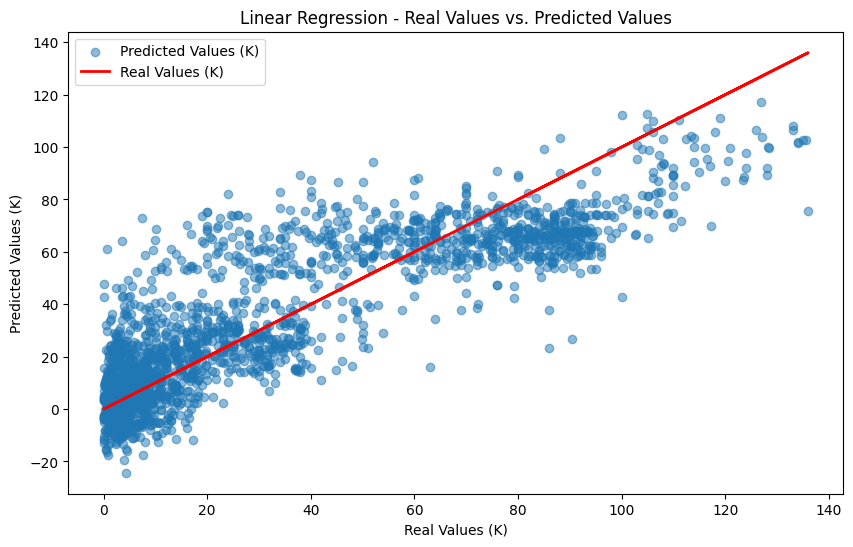

In [438]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, alpha=0.5, label='Predicted Values (K)')

plt.plot(y_test, y_test, color='red', label='Real Values (K)', linewidth=2)

plt.title('Linear Regression - Real Values vs. Predicted Values')
plt.xlabel('Real Values (K)')
plt.ylabel('Predicted Values (K)')
plt.legend()
plt.show()

* A noticeable pattern appears in the plot, particularly in the 60-80 K range of predicted values, suggesting a possible case of underfitting. Probably, a simple linear model can´t capture the data complexity.

In [439]:
array_residuals = np.array(residuals)

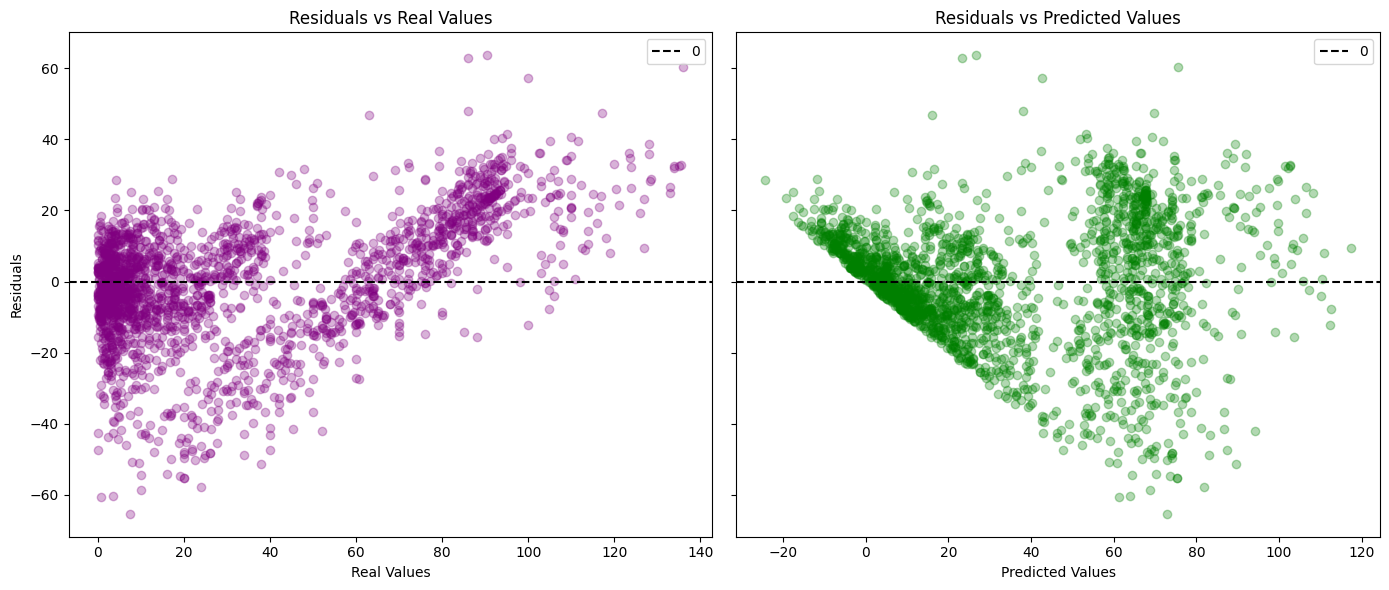

In [440]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

x_real = np.array(df_residuals["Real Value"])
x_pred = np.array(df_residuals["Predicted Value"])

axs[0].scatter(x_real, array_residuals, alpha=0.3, color='purple')
axs[0].set_title("Residuals vs Real Values")
axs[0].set_xlabel("Real Values")
axs[0].set_ylabel("Residuals")

axs[1].scatter(x_pred, array_residuals, alpha=0.3, color='green')
axs[1].set_title("Residuals vs Predicted Values")
axs[1].set_xlabel("Predicted Values")

axs[0].axhline(0, color="black", ls="--", label="0")
axs[1].axhline(0, color="black", ls="--", label="0")

axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.show()


There is a high concentration of instances around 0 K, where the model performs reasonably well, with most residuals ranging between -20 K and 20 K. However, as the real values increase (above 20 K), the residuals follow a linear trend, where both positive and negative errors grow proportionally. This suggests that the model underestimates high values and overestimates low values, indicating heteroscedasticity (the variability of the residuals increases with the predicted values).

In the second plot, for predicted values below 0, a linear pattern is observed, which is consistent with the fact that negative values do not exist in the dataset. In addition, between 60 K and 80 K, there is a high density of points, suggesting that the model struggles to capture the actual variation in this range, possibly due to an overly simplified relationship between variables.

**Analysis of Variance (ANOVA)**

$$
SSR = \sum_{i=1}^{n} (\hat{y}^{(i)} - \overline{y})^2
$$

$$
SSE = \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2
$$

$$
SST = \sum_{i=1}^{n} (y^{(i)} - \overline{y})^2
$$

where:
* $ y^{(i)}$: Real value
* $ \hat{y}^{(i)}$: Predicted value
* $\overline{y}$: Data mean
* SSE: squared sum of the error terms
* SST: squared sum of the data variance

*F test*: Check how much of the variability in Y can be explained by the model and how much can be attributed to the effect of random error. In a nutshell, it can be used to verify if at least one of the independent variables in the model has a significant effect on the dependent variable.

* $h_0$: $B_i = 0, \forall{1, 2 ... 81}$
* $h_1: B_i \neq 0$

If $h_0$ is not rejected, we can say that there is no linear relationship between X and Y.

In [441]:
significance = 0.05

In [442]:
def SSE(y_test, y_predicted): # Sum of Squares Error
    sse = 0
    for i, j in zip(y_test, y_predicted):
        sse += (i - j) ** 2
    return sse

def SST(y_train): # Sum of Squares Total
    mean_y = np.mean(y_train)  
    sst = 0
    for i in y_train:
        sst += (i - mean_y) ** 2  
    return sst

def SSR(y_train, y_predicted):  # Sum of Squares Regression
    mean_y = np.mean(y_train)  
    ssr = 0
    for i, j in zip(y_train, y_predicted):
        ssr += (j - mean_y) ** 2  
    return ssr

In [443]:
y_train_predicted = lr.predict(X_train)

In [444]:
ssr = SSR(y_train, y_train_predicted)
sst = SST(y_train) 
sse = SSE(y_train, y_train_predicted)

p = len(df.drop(["critical_temp"], axis=1).columns)
n = len(y_test)

In [445]:
anova = {
    "Degrees of freedom": [p, (n- p -1), n-1],
    "Sum of squares": [ssr, sse, sst],
    "Mean Square": [ssr/p, (sse/(n- p - 1)), sst/(n-1)],
    "F test": [((ssr / p) / (sse / (n - p - 1))), "-", "-"],
}

df_anova = pd.DataFrame.from_dict(anova)
df_anova.index = ["Regression", "Residuals", "Total"]
display(df_anova)

,Degrees of freedom,Sum of squares,Mean Square,F test
Regression,81,1.655738e+07,204412.145258,70.613164
Residuals,2044,5.917005e+06,2894.816403,-
Total,2125,2.249195e+07,10584.446925,-


Based on the test result, considering the degrees of freedom of the numerator and denominator, to find the p-value, it is necessary to check whether the test F value lies within the rejection area of the hypothesis, corresponding to 5% of the distribution. This can be done by calculating the cumulative distribution function of the F distribution, that gives the probability that variable X is less than or equal to x.

In [446]:
p_value = 1 - f.cdf(((ssr / p) / (sse / (n - p - 1))), p, (n- p -1))
print(f"p-value is {p_value:.4}")
if p_value < significance:
    print(f"h_0 can be rejected")
else:
    print(f"h_0 can´t be rejected")

p-value is 1.11e-16
h_0 can be rejected


**R squared**

**${R^2}$** (Coefficient of determination): The proportion of the total variance in the target variable that is explained by the model. It can be calculated by two differente ways, depending if the model has or not intercept. 

With intercept:

$$
R^2 = 1 - \frac{SSE}{SST}
$$

Without intercept:

$$
R^2 = 1 - \frac{SSE}{\sum_{i=1}^{n} (y^{(i)})^2}
$$

Considering that the OLS model has no intercept, it is possible to calculate the r squared with the second formula.

In [447]:
def r_squared(SSE, y_test):
    return 1 - (sse/ sum(([i**2 for i in y_test])))

In [448]:
r_squared = r_squared(sse, y_train)

In [449]:
print(f"The R-squared of the model is {r_squared:.4f}") 

The R-squared of the model is 0.8692


The same result can be obtained by the rsquared method of statsmodel.

In [450]:
print(f"The R-squared of the model is {lr.rsquared:.4f}") 

The R-squared of the model is 0.8692


**Feature Importance**

Absolute value of a t-statistic, it is useful to evaluate the statistic significance of each feature. 

$$
t_{\beta_n} = \frac{\beta_n}{\mathrm{SE}(\beta_n)}
$$
where:
* $\beta_n$:  estimated weight scaled (The bigger, the more important)
* $\mathrm{SE}(\beta_n)$: coefficient standard error (The smaller, the more important)


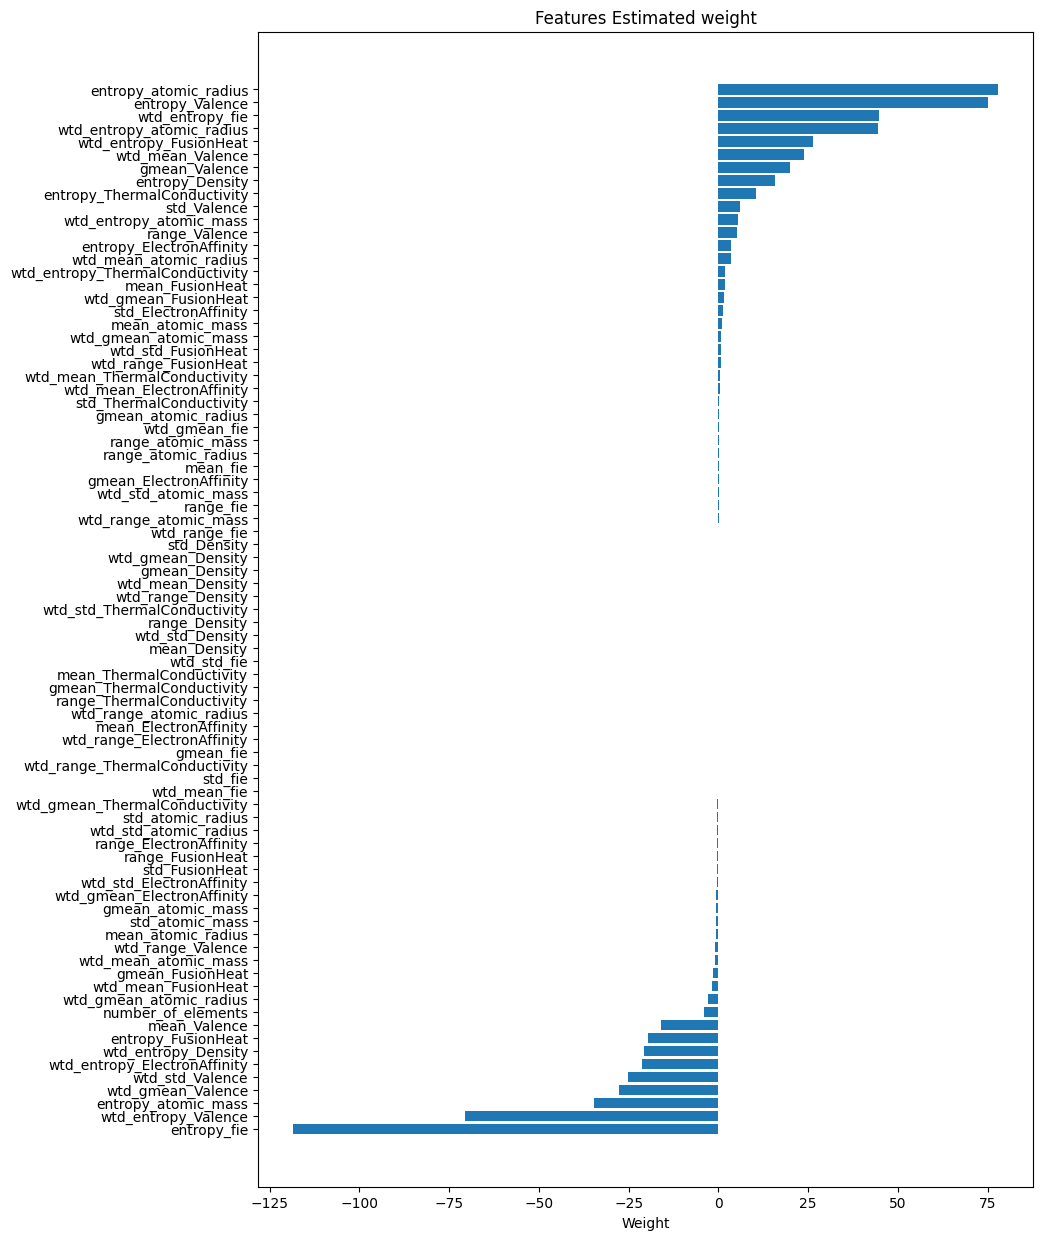

In [451]:
df_weights = pd.DataFrame({
    'Feature': lr.params.index,
    'Coefficient': np.array(lr.params)
})

df_weights = df_weights.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(df_weights['Feature'], df_weights['Coefficient'])
plt.xlabel('Weight')
plt.title('Features Estimated weight')
plt.gca().invert_yaxis() 
plt.show()

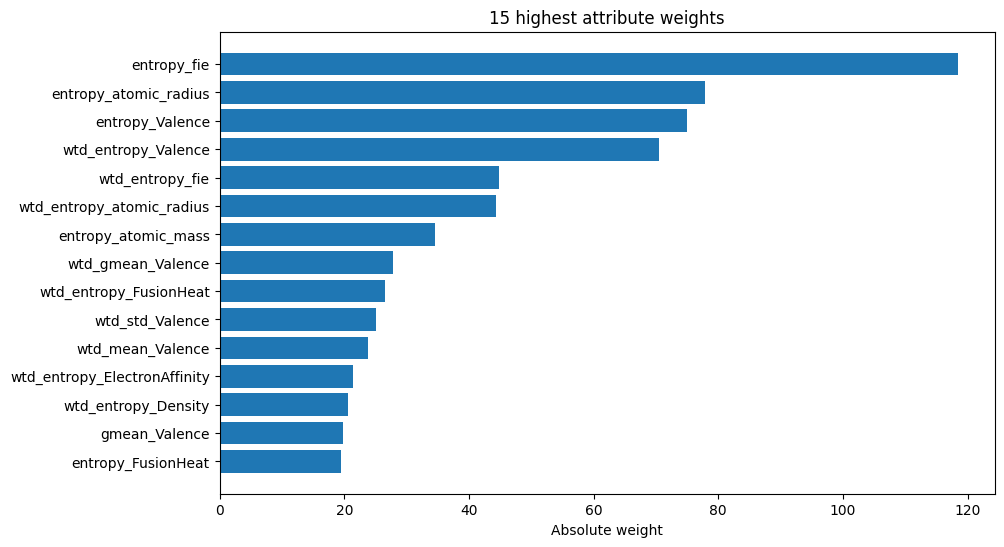

In [452]:
df_weights_abs = pd.DataFrame({
    'Feature': lr.params.index,
    'Coefficient': np.array(abs(lr.params))
})

df_weights_abs = df_weights_abs.sort_values(by='Coefficient', ascending=False)
df_weights_abs_15 = df_weights_abs[:15]

plt.figure(figsize=(10, 6))
plt.barh(df_weights_abs_15['Feature'], df_weights_abs_15['Coefficient'])
plt.xlabel('Absolute weight')
plt.title('15 highest attribute weights')
plt.gca().invert_yaxis() 
plt.show()

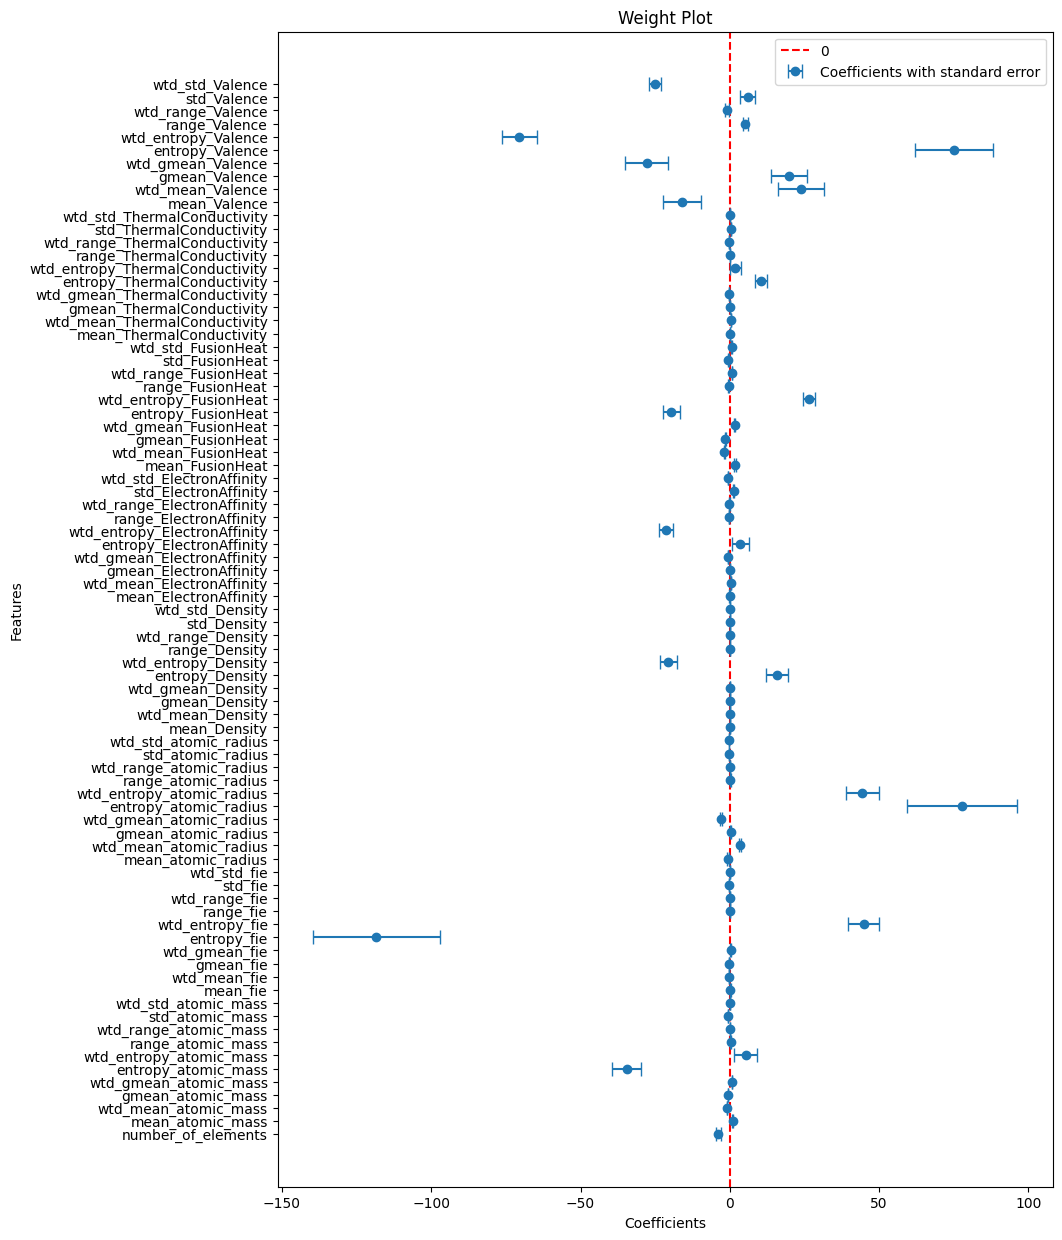

In [453]:
x = np.array(lr.params)  
y = lr.params.index
error = np.array(lr.bse) 

plt.figure(figsize=(10, 15))
plt.axvline(0, color='r', linestyle='dashed', label="0")
plt.errorbar(x, y, xerr=error, fmt="o", capsize=5, label ="Coefficients with standard error")
plt.legend()
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.title('Weight Plot')
plt.show()


* The largest coefficients have the largest errors

In [454]:
bn = np.array(lr.params)
se_bn = np.array(lr.bse)

In [455]:
feature_importance = bn/se_bn

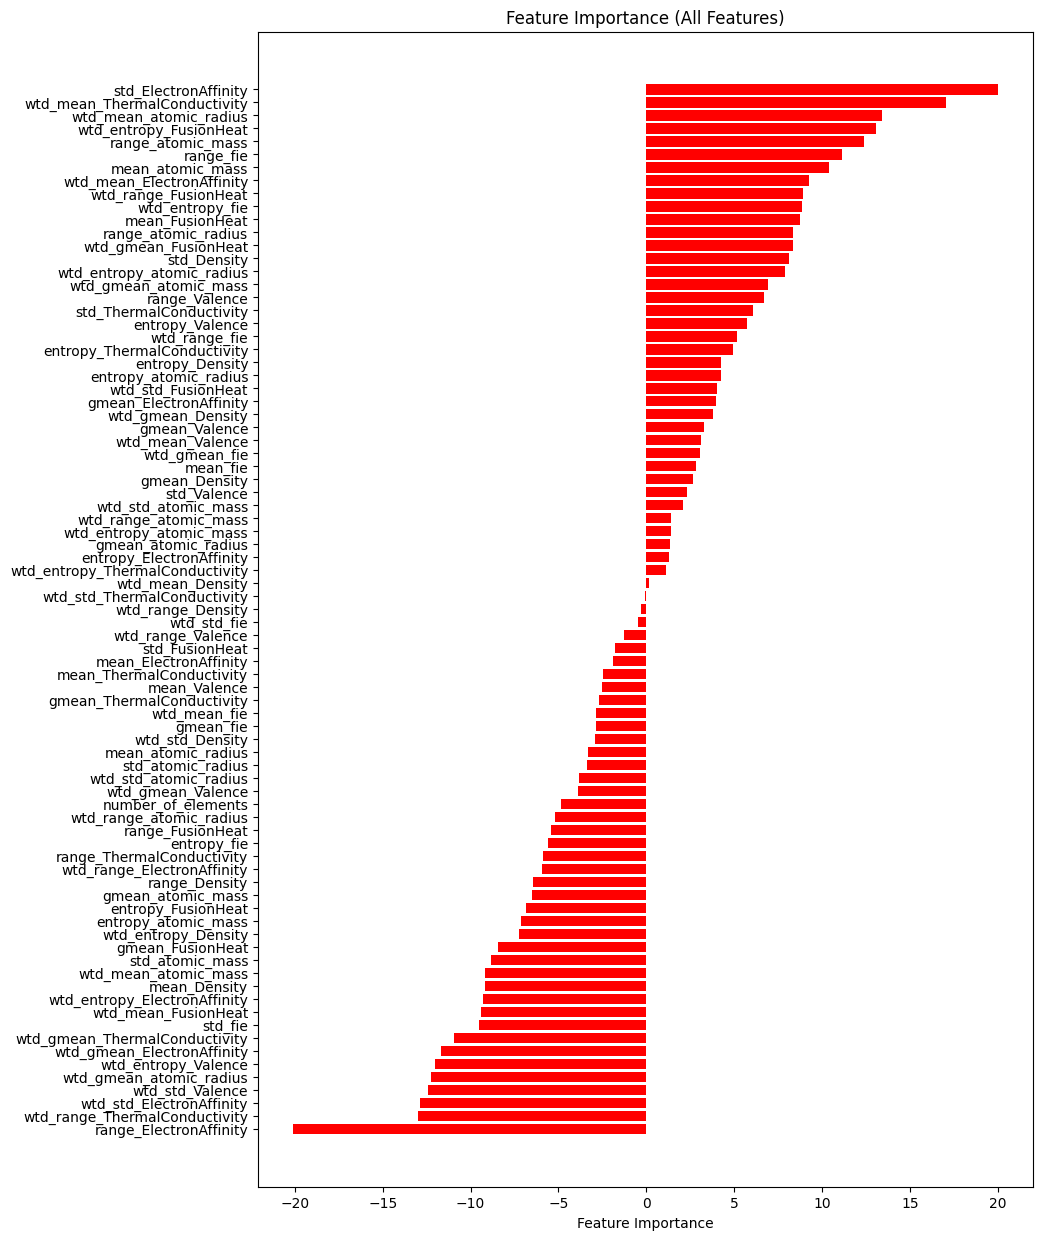

In [456]:
df_feature_importance = pd.DataFrame({
    'Feature': lr.params.index,
    'Feature Importance': np.array(feature_importance)
})

df_feature_importance= df_feature_importance.sort_values(by='Feature Importance', ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Feature Importance'], color="red")
plt.xlabel('Feature Importance')
plt.title('Feature Importance (All Features)')
plt.gca().invert_yaxis() 
plt.show()

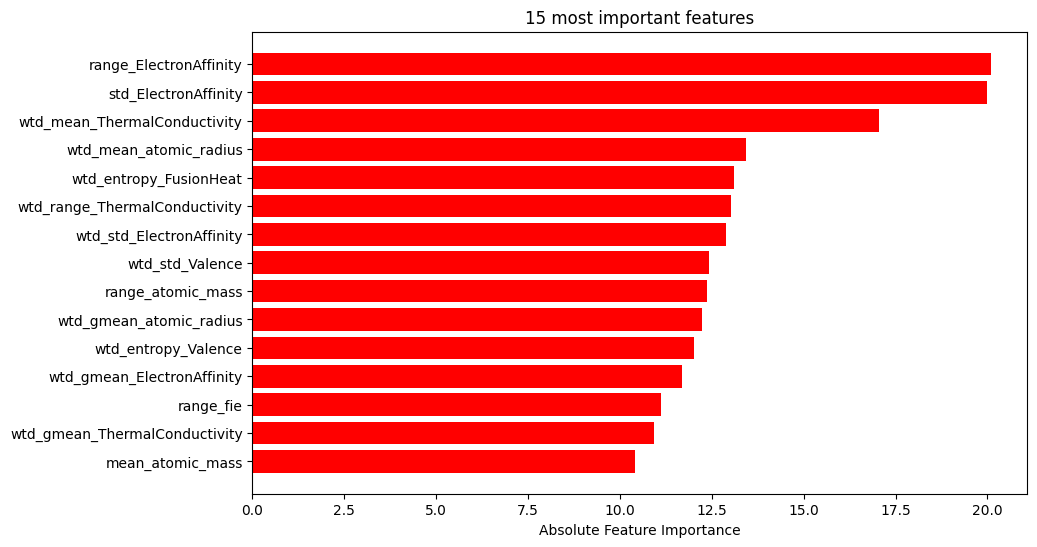

In [457]:
df_feature_importance_abs = pd.DataFrame({
    'Feature': lr.params.index,
    'Feature Importance': np.array(abs(feature_importance))
})

df_feature_importance_abs = df_feature_importance_abs.sort_values(by='Feature Importance', ascending=False)
df_feature_importance_abs_15 = df_feature_importance_abs[:15]


plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance_abs_15['Feature'], df_feature_importance_abs_15['Feature Importance'], color="red")
plt.xlabel('Absolute Feature Importance')
plt.title('15 most important features')
plt.gca().invert_yaxis() 
plt.show()

* In general, the most important features are related to Electron Affinity, Thermal Conductivity, Atomic Radius, Valence and Atomic mass.

**Effect Plot**

The effect plot displays a distribution of the product between each instance and its corresponding weight for each column. It is less sensitive to differences in scale because, although the weights depend on the feature scale, the actual effects in the data remain unchanged. Additionally, understanding the distribution of your feature is important, as low variance in a feature suggests that most instances contribute similarly to this feature's impact.

effect $_j^{(i)} = w_j x_j^{(i)}$

In [458]:
effect = {}
for column in X_test.columns:
    weight = lr.params[column]
    effect[column] = weight * X_train[column]

df_effect = pd.DataFrame.from_dict(effect)

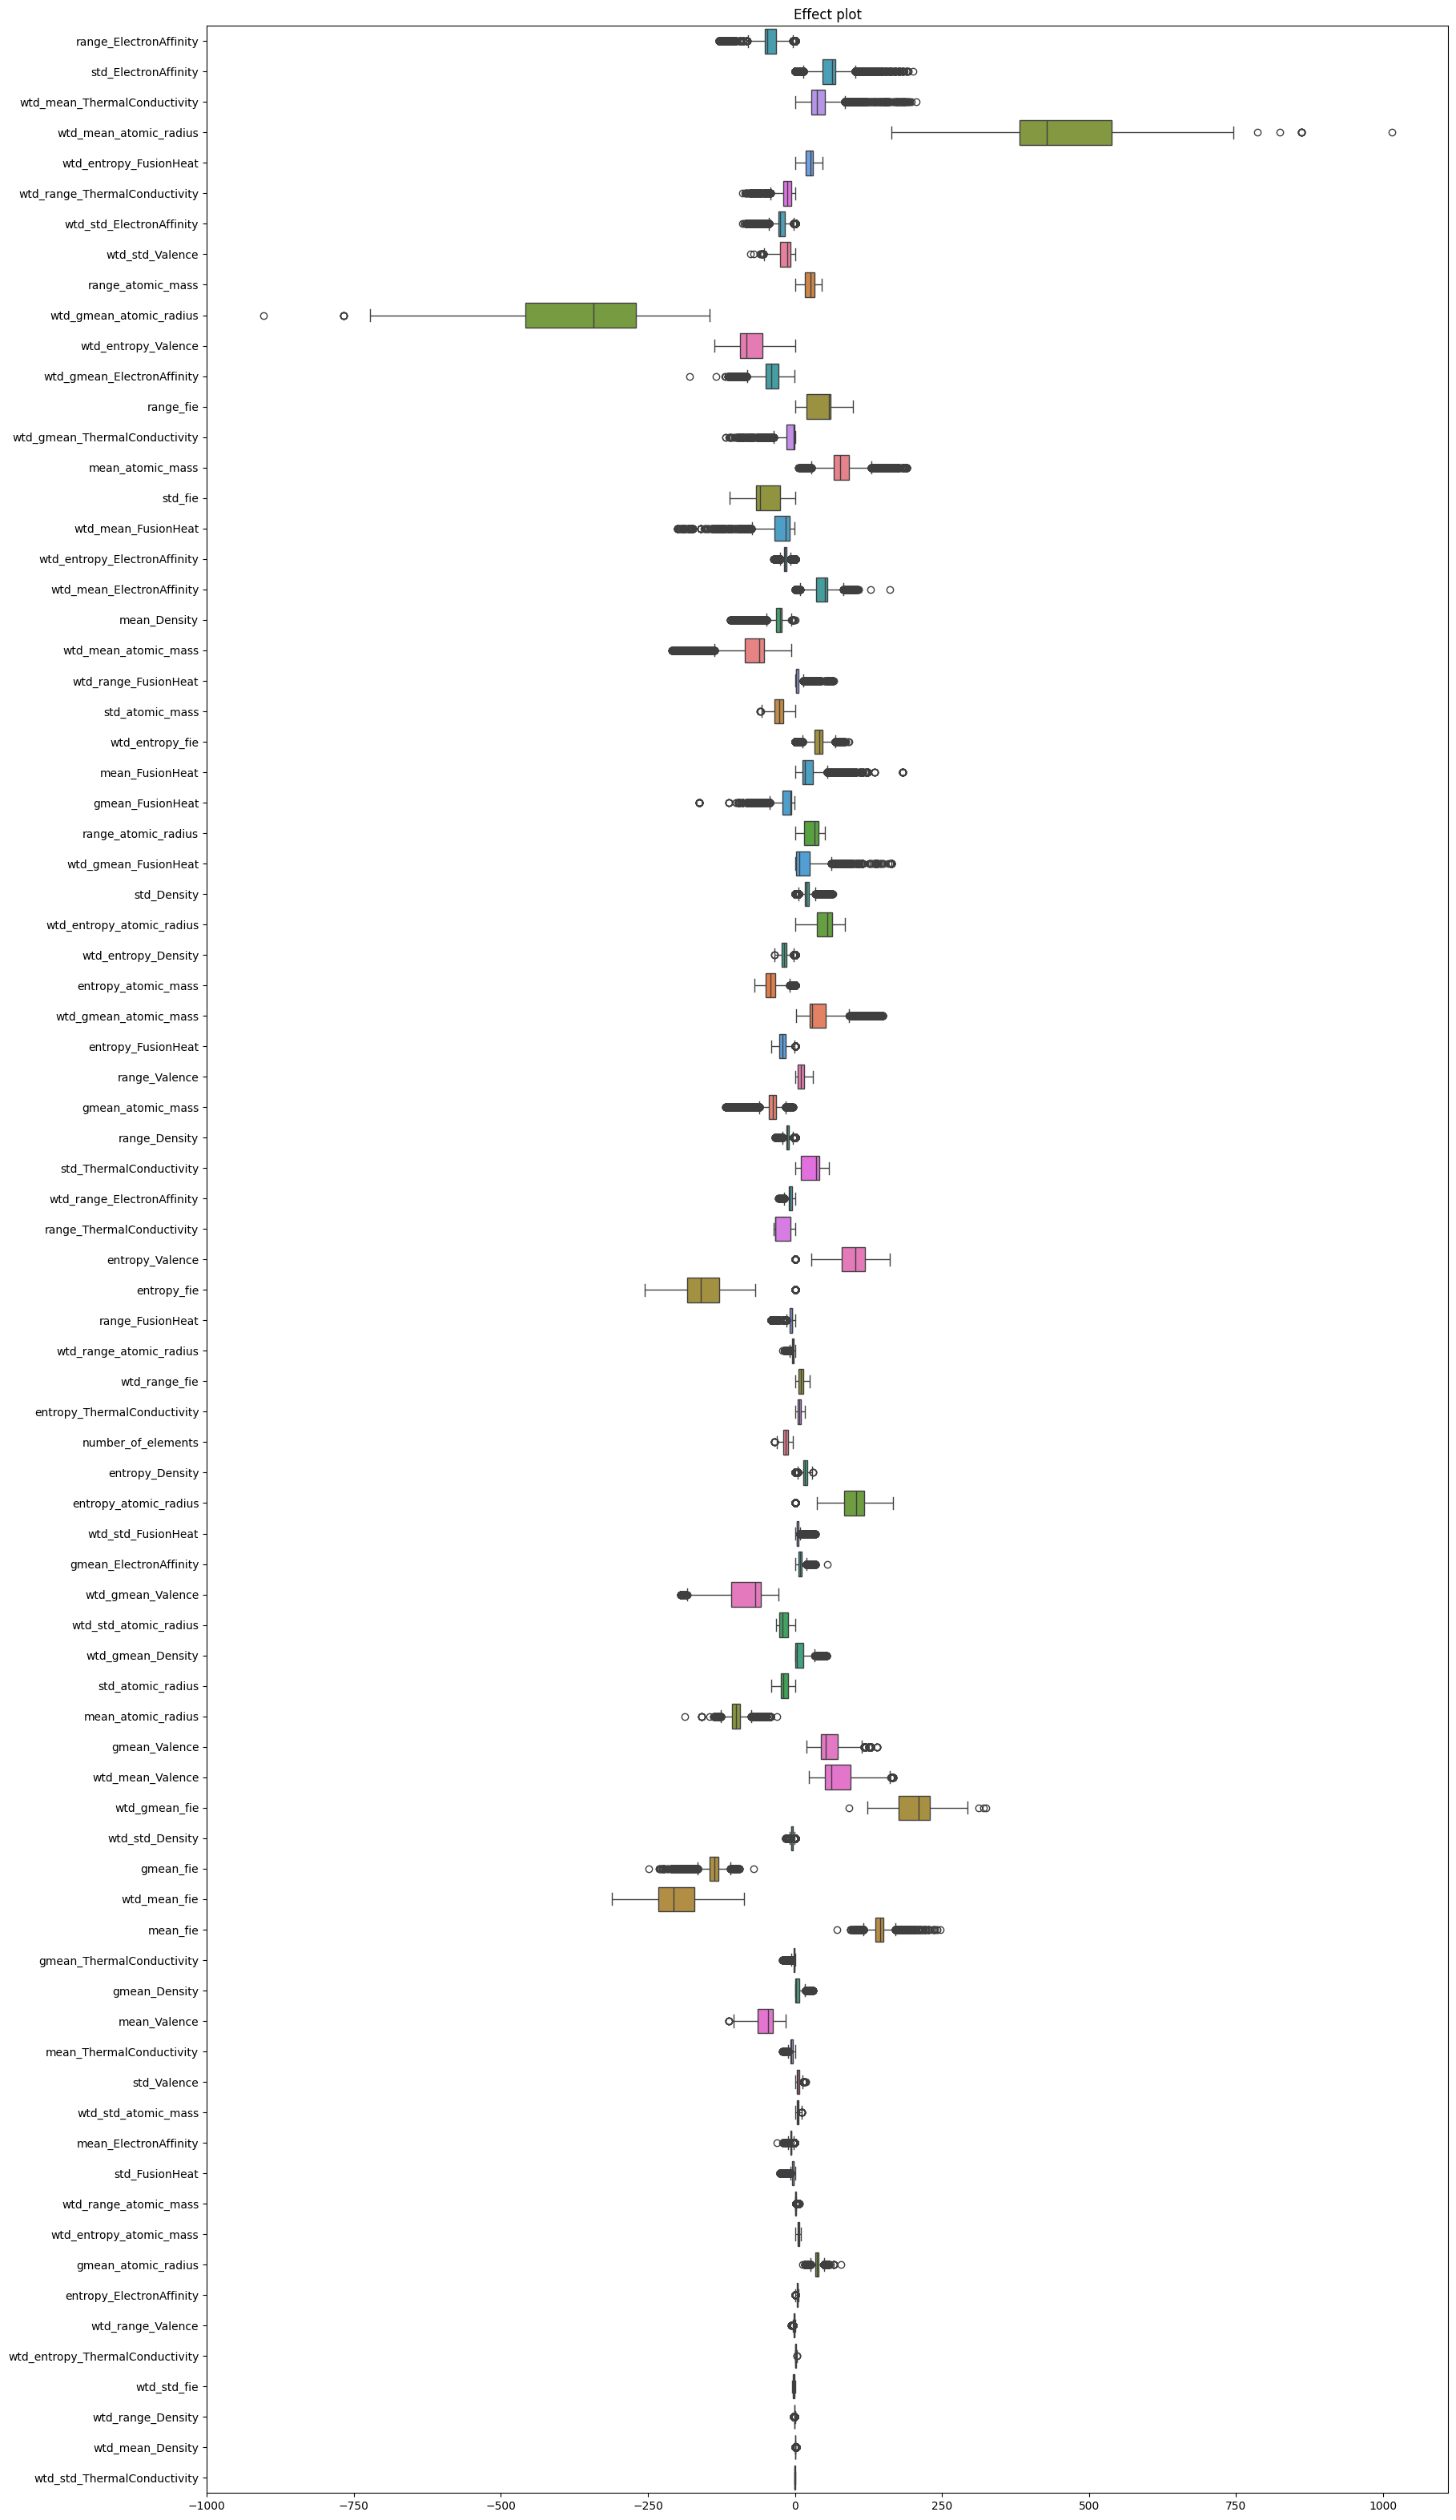

In [459]:
plt.figure(figsize=(20, 40))
sns.boxplot(df_effect, order=list(df_feature_importance_abs["Feature"]), orient="h");
plt.title("Effect plot");

* Features related to atomic radius, first ionization energy and valence (attributes, in general, related to the atomic size) apresented the highest variances. 

***

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong> 🐛Sparse Linear Models </strong>
    </h3>
</body>
</html>

Sparse models introduce sparsity into linear models, helping to reduce dimensionality and mitigate multicollinearity, which can otherwise lead to instability. In traditional OLS regression, highly correlated features often result in large coefficient estimates, making the model less reliable. So, with this objective, other types of regressions, like Lasso and Ridge, and techniques to introduce sparsity, were created.

**Least Absolute Shrinkage and Selection Operator (Lasso)**

Generally, the minimization problem that the weights optimize can be describe as:

$$ 
min_{\beta} \left(\displaystyle\frac{1}{n} \sum_{i=1}^{n}(y^{(i)} - x_i^T\beta)^2\right)
$$


In sum, Lasso performs feature selection and regularization of the selected feature weights, by adding a cost in the lost function (L1 penalty or LASSO).

$$
min_{\beta} \left(\displaystyle\frac{1}{n} \sum_{i=1}^{n}(y^{(i)} - x_i^T\beta)^2 + \lambda||\beta||_1\right)
$$

The Lasso technique incorporates the L1-norm of the feature vector, denoted as $||\beta||_1$, which penalizes large weights. Because of the L1-norm, many of the less important feature weights are driven to zero, while the remaining weights are shrunk. Additionally, the regularization strength is controlled by the parameter lambda ($\lambda$), which is typically tuned using cross-validation.

To understand the effect of the lambda in lasso, it is possible to train many models, only variating this constant. After that, it is useful to analyse the 15 most important features (determinated by the other tests with OLS) and compare them with the 15 initial most important features determined by lasso.

In [460]:
weights_feature_importance = []
weights_lasso = []
idxs_lasso = []

idxs_lasso_repeated = set()

for p_lambda in range(1, 11):
    model = sm.OLS(y_train, X_train)
    lasso= model.fit_regularized(
    alpha=p_lambda,
    refit=True,
)
    print(f"The R-squared of the model with lambda={p_lambda} is {lasso.rsquared:.4f}") 
    weights_fi = []
    for column in df_feature_importance_abs_15["Feature"].index:
        weights_fi.append(lasso.params[column])
    weights_feature_importance.append(weights_fi)


    weights_lasso_importance = []
    idxs_lasso_importance= []


    params = list(lasso.params)  
    for i in range(15):
        weight_li = max(params, key=abs)  
        index_li= params.index(weight_li) 
        idxs_lasso_repeated.add(index_li)
        weights_lasso_importance.append(weight_li)
        idxs_lasso_importance.append(index_li)
        params[index_li] = 0 

    for i in idxs_lasso_repeated:
        if i not in idxs_lasso_importance:
            idxs_lasso_importance.append(i)
            weights_lasso_importance.append(params[i])

    weights_lasso.append(weights_lasso_importance)
    idxs_lasso.append(idxs_lasso_importance)


The R-squared of the model with lambda=1 is 0.8574
The R-squared of the model with lambda=2 is 0.8558
The R-squared of the model with lambda=3 is 0.8540
The R-squared of the model with lambda=4 is 0.8507
The R-squared of the model with lambda=5 is 0.8482
The R-squared of the model with lambda=6 is 0.8363
The R-squared of the model with lambda=7 is 0.8387
The R-squared of the model with lambda=8 is 0.8444
The R-squared of the model with lambda=9 is 0.8349
The R-squared of the model with lambda=10 is 0.8393


* The best result was lambda = 0 (as expected)

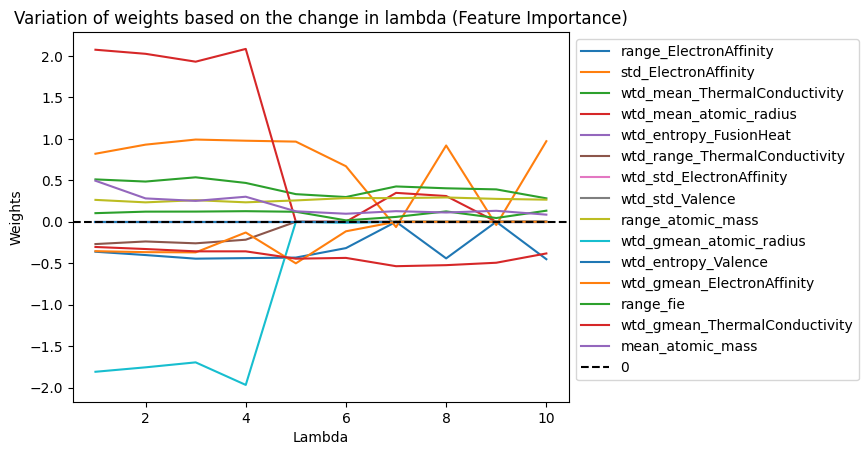

In [461]:
x = range(1,11)
plt.plot(x, [i[0] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[0])
plt.plot(x, [i[1] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[1])
plt.plot(x, [i[2] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[2])
plt.plot(x, [i[3] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[3])
plt.plot(x, [i[4] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[4])
plt.plot(x, [i[5] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[5])
plt.plot(x, [i[6] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[6])
plt.plot(x, [i[7] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[7])
plt.plot(x, [i[8] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[8])
plt.plot(x, [i[9] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[9])
plt.plot(x, [i[10] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[10])
plt.plot(x, [i[11] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[11])
plt.plot(x, [i[12] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[12])
plt.plot(x, [i[13] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[13])
plt.plot(x, [i[14] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[14])

plt.axhline(0, color="black", ls="--", label="0")
plt.title("Variation of weights based on the change in lambda (Feature Importance)")
plt.xlabel("Lambda")
plt.ylabel("Weights")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [462]:
lasso_weights_15 = []
lasso_idxs_15 = []

for i, j in zip(idxs_lasso, weights_lasso):
    lw15 = []  
    li15 = []  
    
    for k, l in zip(i, j):
        if k in idxs_lasso[0]:  
            li15.append(k)
            lw15.append(l)
    
    lasso_idxs_15.append(li15)  
    lasso_weights_15.append(lw15)  


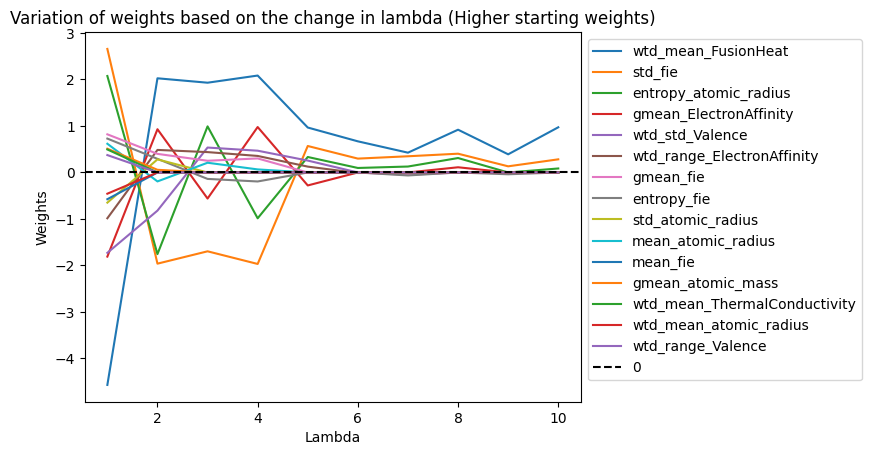

In [463]:
x = range(1,11)
plt.plot(x, [i[0] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][0]])
plt.plot(x, [i[1] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][1]])
plt.plot(x, [i[2] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][2]])
plt.plot(x, [i[3] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][3]])
plt.plot(x, [i[4] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][4]])
plt.plot(x, [i[5] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][5]])
plt.plot(x, [i[6] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][6]])
plt.plot(x, [i[7] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][7]])
plt.plot(x, [i[8] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][8]])
plt.plot(x, [i[9] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][9]])
plt.plot(x, [i[10] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][10]])
plt.plot(x, [i[11] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][11]])
plt.plot(x, [i[12] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][12]])
plt.plot(x, [i[13] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][13]])
plt.plot(x, [i[14] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][14]])


plt.axhline(0, color="black", ls="--", label="0")
plt.title("Variation of weights based on the change in lambda (Higher starting weights)")
plt.xlabel("Lambda")
plt.ylabel("Weights")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [464]:
len(lasso.params)

81

In [465]:
count = 0
for i in idxs_lasso[0]:
    if i in list(df_feature_importance_abs_15["Feature"].index):
        count += 1
print(count)

5


In [466]:
feature_importance_lasso = np.array(lasso.params)/np.array(lasso.bse)
feature_importance_lasso = np.nan_to_num(feature_importance_lasso, nan=0)

C:\Users\julia24002\AppData\Local\Temp\ipykernel_18556\1505989439.py:1: RuntimeWarning: invalid value encountered in divide
  feature_importance_lasso = np.array(lasso.params)/np.array(lasso.bse)


In [467]:
df_lasso_final_weights = pd.DataFrame({
    "Features": X_train.columns,
    "Feature Importance": feature_importance_lasso
}).sort_values(by='Feature Importance', ascending=False)

In [468]:
len(list([df_feature_importance["Feature"][i] for i in idxs_lasso[0]]))

15

In [469]:
len(list(df_feature_importance_abs_15["Feature"]))

15

* 5 features in common

In [470]:
df_common_features = pd.DataFrame({
    "Feature Importance (OLS)": list(df_feature_importance_abs_15["Feature"]),
    "Higher weights (OLS)": list(df_weights_abs_15["Feature"]),
    "Higher starting weights (LASSO)": [df_feature_importance["Feature"][i] for i in idxs_lasso[0]],
    "Final feature importance (LASSO)": list(df_lasso_final_weights["Features"][:15])
})

display(df_common_features)

,Feature Importance (OLS),Higher weights (OLS),Higher starting weights (LASSO),Final feature importance (LASSO)
0,range_ElectronAffinity,entropy_fie,mean_Valence,range_fie
1,std_ElectronAffinity,entropy_atomic_radius,wtd_mean_Valence,range_atomic_mass
2,wtd_mean_ThermalConductivity,entropy_Valence,wtd_mean_atomic_radius,std_ElectronAffinity
3,wtd_mean_atomic_radius,wtd_entropy_Valence,wtd_gmean_atomic_radius,wtd_mean_ThermalConductivity
4,wtd_entropy_FusionHeat,wtd_entropy_fie,range_Valence,mean_fie
5,wtd_range_ThermalConductivity,wtd_entropy_atomic_radius,wtd_std_FusionHeat,mean_ThermalConductivity
6,wtd_std_ElectronAffinity,entropy_atomic_mass,std_ElectronAffinity,range_atomic_radius
7,wtd_std_Valence,wtd_gmean_Valence,wtd_range_FusionHeat,wtd_range_Density
8,range_atomic_mass,wtd_entropy_FusionHeat,wtd_mean_FusionHeat,mean_atomic_mass
9,wtd_gmean_atomic_radius,wtd_std_Valence,mean_FusionHeat,wtd_gmean_Density


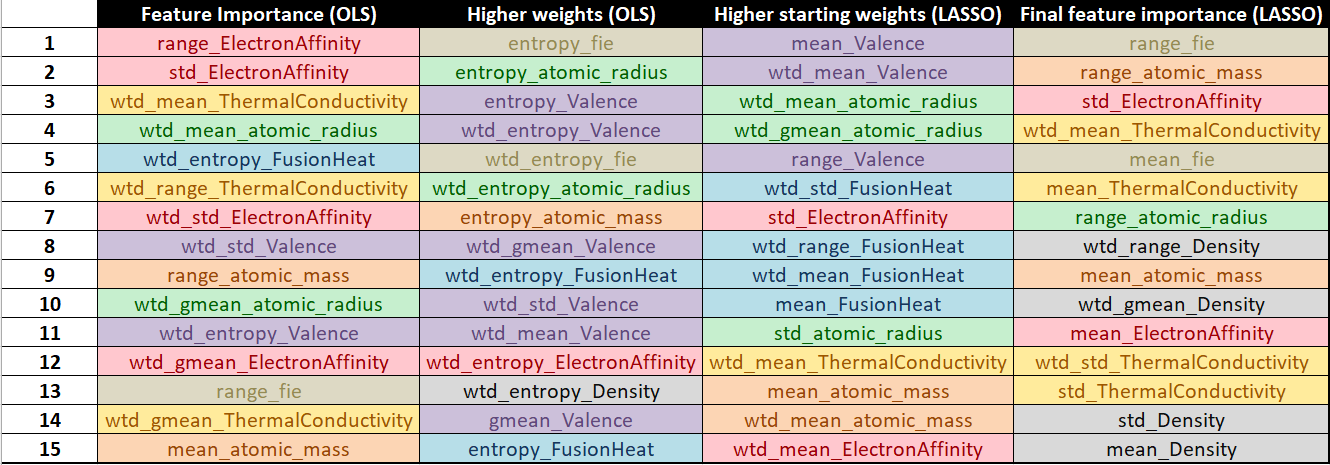

**Ridge Regression**

As Lasso Regression, Ridge uses regularization to reduce multicolinearity, by adding a penalty term (in this case L2) in the loss function.

$$
min_{\beta} \left(\displaystyle\frac{1}{n} \sum_{i=1}^{n}(y^{(i)} - x_i^T\beta)^2 + \lambda||\beta||^2\right)
$$

But different from the other model, the L2 penalty shrinks coefficients towards zero but never to absolute zero. So, Ridge cannot be consider a feature selection technique, as it retains all features while merely reducing their impact.[4]

Statsmodel (the module used to training the other models) doesn´t have a ridge implementation. So, we can use Scikit-learn to train this model. To find the optimal constraint alpha value, we can use the cross-validation, that try different combinations to define the best model.

In [471]:
r_squared_ridge = []
for p_lambda in [0.001, 0.01, 0.1, 1, 10, 50, 100, 250, 500, 750, 1000]:
    ridge= Ridge(alpha=p_lambda)
    ridge.fit(X_train,y_train)

    train_score_ridge = ridge.score(X_train, y_train)
    r_squared_ridge.append(train_score_ridge)
    print(f"The R-squared of the model with lambda={p_lambda} is {train_score_ridge:.4f}") 

The R-squared of the model with lambda=0.001 is 0.7372
The R-squared of the model with lambda=0.01 is 0.7372
The R-squared of the model with lambda=0.1 is 0.7372
The R-squared of the model with lambda=1 is 0.7369
The R-squared of the model with lambda=10 is 0.7351
The R-squared of the model with lambda=50 is 0.7322
The R-squared of the model with lambda=100 is 0.7308
The R-squared of the model with lambda=250 is 0.7286
The R-squared of the model with lambda=500 is 0.7268
The R-squared of the model with lambda=750 is 0.7257
The R-squared of the model with lambda=1000 is 0.7249


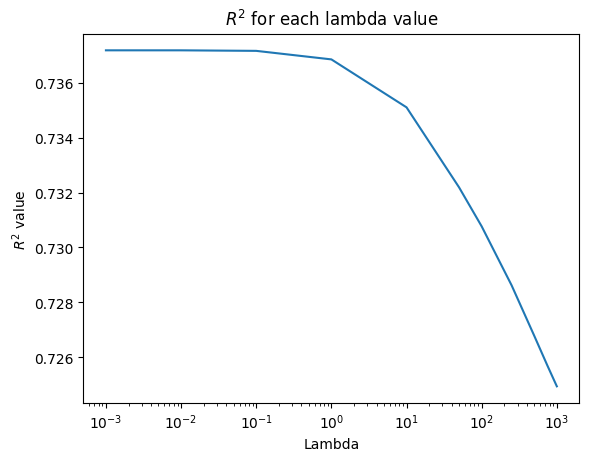

In [472]:
x = [0.001, 0.01, 0.1, 1, 10, 50, 100, 250, 500, 750, 1000]
    
plt.plot(x, r_squared_ridge)
plt.title(f"$R^2$ for each lambda value")
plt.ylabel("$R^2$ value")
plt.xscale("log")
plt.xlabel("Lambda")
plt.show();

* How expected, the model performance decreased when the lambda value increased

**Cross validation**

The Lasso and Ridge models exhibited, in conventional validations, a lower performance compared to the traditional regression model. However, these models stand out in cross-validation, which involves splitting the training data into k parts, with k-1 used for training and the remaining part for testing, providing a more robust evaluation of model performance. This approach is particularly effective for predicting unknown data, as it aims to reduce the occurrence of overfitting. Furthermore, the cross-validation methods for Lasso and Ridge, implemented in the Scikit-Learn library, can still be used to find the optimal value of lambda.

To evaluate the models, besides r squared, RMSE can be used. Root Mean Squared Error (RMSE) is a commonly used metric for evaluating model performance. It is calculated as the square root of the Mean Squared Error (MSE), which represents the average of the squared differences between the actual and predicted values.

$$
RMSE = \sqrt{MSE} = \sqrt{\sum_{i=1}^{N} \frac{(y_i - \hat{y}_i)^2}{N}},
$$

In [480]:
def rmse(y_test, y_predicted): 
    rmse_sum = 0
    for i, j in zip(y_test, y_predicted):
        rmse_sum += (j - i)**2
    return (rmse_sum / len(y_test))**(1/2)

So, let´s test!

In [492]:
lasso_cv = LassoCV(cv=10, random_state=1702).fit(X_train, y_train)
print(f"The chosen lambda was: {lasso_cv.alpha_}")

The chosen lambda was: 73.21351445341992


***

<html>
<body>
    <h3>
        <strong> 🐙 Generalized Linear Models (GLMs) </strong>
    </h3>
</body>
</html>

**Shapiro Wilk**

Do the columns follow a normal distribution? It is possible to check this with the Shapiro-Wilk test.

In [473]:
from scipy import stats

count = 0
for column in df.columns:
    test_result = stats.shapiro(df[column])
    pvalue = test_result.pvalue

    if pvalue <= significance:
        print(f"The column '{column}' does not follow a Gaussian distribution.")
        count += 1

print(f"{count} columns do not follow a Gaussian distribution.")


The column 'number_of_elements' does not follow a Gaussian distribution.
The column 'mean_atomic_mass' does not follow a Gaussian distribution.
The column 'wtd_mean_atomic_mass' does not follow a Gaussian distribution.
The column 'gmean_atomic_mass' does not follow a Gaussian distribution.
The column 'wtd_gmean_atomic_mass' does not follow a Gaussian distribution.
The column 'entropy_atomic_mass' does not follow a Gaussian distribution.
The column 'wtd_entropy_atomic_mass' does not follow a Gaussian distribution.
The column 'range_atomic_mass' does not follow a Gaussian distribution.
The column 'wtd_range_atomic_mass' does not follow a Gaussian distribution.
The column 'std_atomic_mass' does not follow a Gaussian distribution.
The column 'wtd_std_atomic_mass' does not follow a Gaussian distribution.
The column 'mean_fie' does not follow a Gaussian distribution.
The column 'wtd_mean_fie' does not follow a Gaussian distribution.
The column 'gmean_fie' does not follow a Gaussian distribut

C:\Users\julia24002\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21263.
  res = hypotest_fun_out(*samples, **kwds)


In [474]:
stats.expon.fit(df["critical_temp"])

(0.00021, 34.421009135352485)

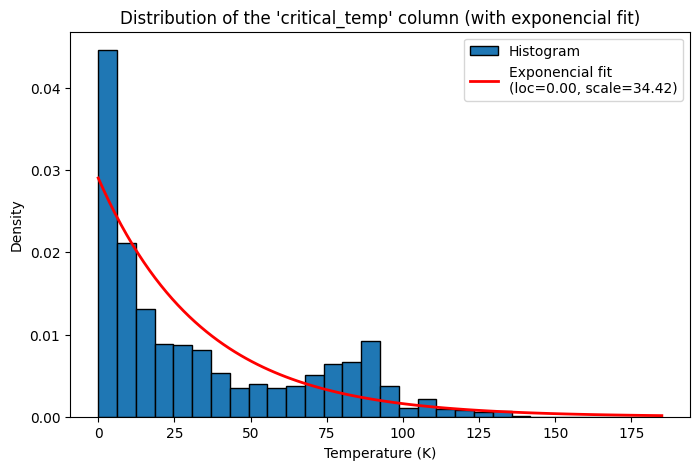

In [475]:
loc, scale = stats.expon.fit(df["critical_temp"])

x = np.linspace(min(df["critical_temp"]), max(df["critical_temp"]), 100)


pdf_fitted = stats.expon.pdf(x, loc=loc, scale=scale) 

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.hist(df["critical_temp"], density=True, bins=30, edgecolor='black', label="Histogram") # the total area of histogram is equal to 1

ax.plot(x, pdf_fitted, 'r-', lw=2, label=f"Exponencial fit\n(loc={loc:.2f}, scale={scale:.2f})")

ax.set_title("Distribution of the 'critical_temp' column (with exponencial fit)")
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Density")
ax.legend()

plt.show()


They don't! One of the key assumptions of traditional linear regression is that the target variable follows a Gaussian distribution. However, as seen in the distribution plot of the 'critical temp' column, this assumption does not hold: the target distribution follows a Exponential distribution (this make sense: besides the distribution format, the critical temperature is a continual variable that can only assume positive values). In this case, a Generalized Linear Model (GLM) can be a good alternative to properly evaluate the regression's performance.

**Generalized Linear Models (GMs)**

GMs are useful for non-linear outcomes, preserving the weighted sum of features while allowing non-Gaussian outcome distributions. These models establish a connection between the expected mean of the distribution and the weighted sum through a potentially nonlinear function

$$
g(E_y(y|x)) = \beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n + \epsilon
$$

where:
* $g()$: link function
* $E_y$: probability distribution from the exponential family (distributions with parameterized formula that includes a exponential, mean/variance of the distribution, etc)

We know that the target distribution belongs to the exponential family. The closest distribution available in Statsmodels is Gamma, which encompasses the exponential distribution. Consequently, we use the logarithm as the link function, as it cancels out the exponential distribution, enhancing interpretability. Typically, the logarithm of the feature is incremented by one, and the prediction is adjusted according to the corresponding weight.

In [476]:
link_function = sm.families.links.Log()

distribuition = sm.families.Gamma(link=link_function)

model_glm = sm.GLM(y_train, X_train, family=distribuition)

glm = model_glm.fit()

print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          critical_temp   No. Observations:                19137
Model:                            GLM   Df Residuals:                    19056
Model Family:                   Gamma   Df Model:                           80
Link Function:                    Log   Scale:                         0.43001
Method:                          IRLS   Log-Likelihood:                -73749.
Date:                Wed, 26 Feb 2025   Deviance:                       9619.3
Time:                        10:35:47   Pearson chi2:                 8.19e+03
No. Iterations:                    52   Pseudo R-squ. (CS):             0.9232
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
number_of_

In [477]:
y_predicted_glm = glm.predict(X_test)

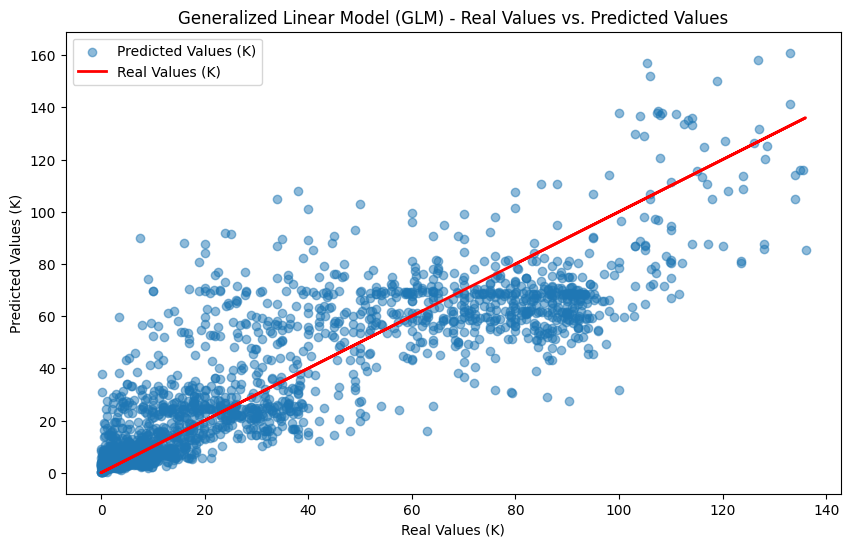

In [478]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted_glm, alpha=0.5, label='Predicted Values (K)')

plt.plot(y_test, y_test, color='red', label='Real Values (K)', linewidth=2)

plt.title('Generalized Linear Model (GLM) - Real Values vs. Predicted Values')
plt.xlabel('Real Values (K)')
plt.ylabel('Predicted Values (K)')
plt.legend()
plt.show()

In [479]:
print(f"The R-squared of the model is {glm.pseudo_rsquared():.4f}") 

The R-squared of the model is 0.9232


**Comparing RMSE**

In [481]:
rmse_glm = rmse(y_test, y_predicted_glm)
rmse_ols = rmse(y_test, y_predicted)
print(f"The RMSE of OlS model is {rmse_ols} \nThe RMSE of GLM model is {rmse_glm}")

The RMSE of OlS model is 17.419480263297828 
The RMSE of GLM model is 17.131652003675555


* The lower the RMSE, the better. So here, RMSE and R squared indicate that GLM is probably a better method for the dataset.

**Feature Importance**

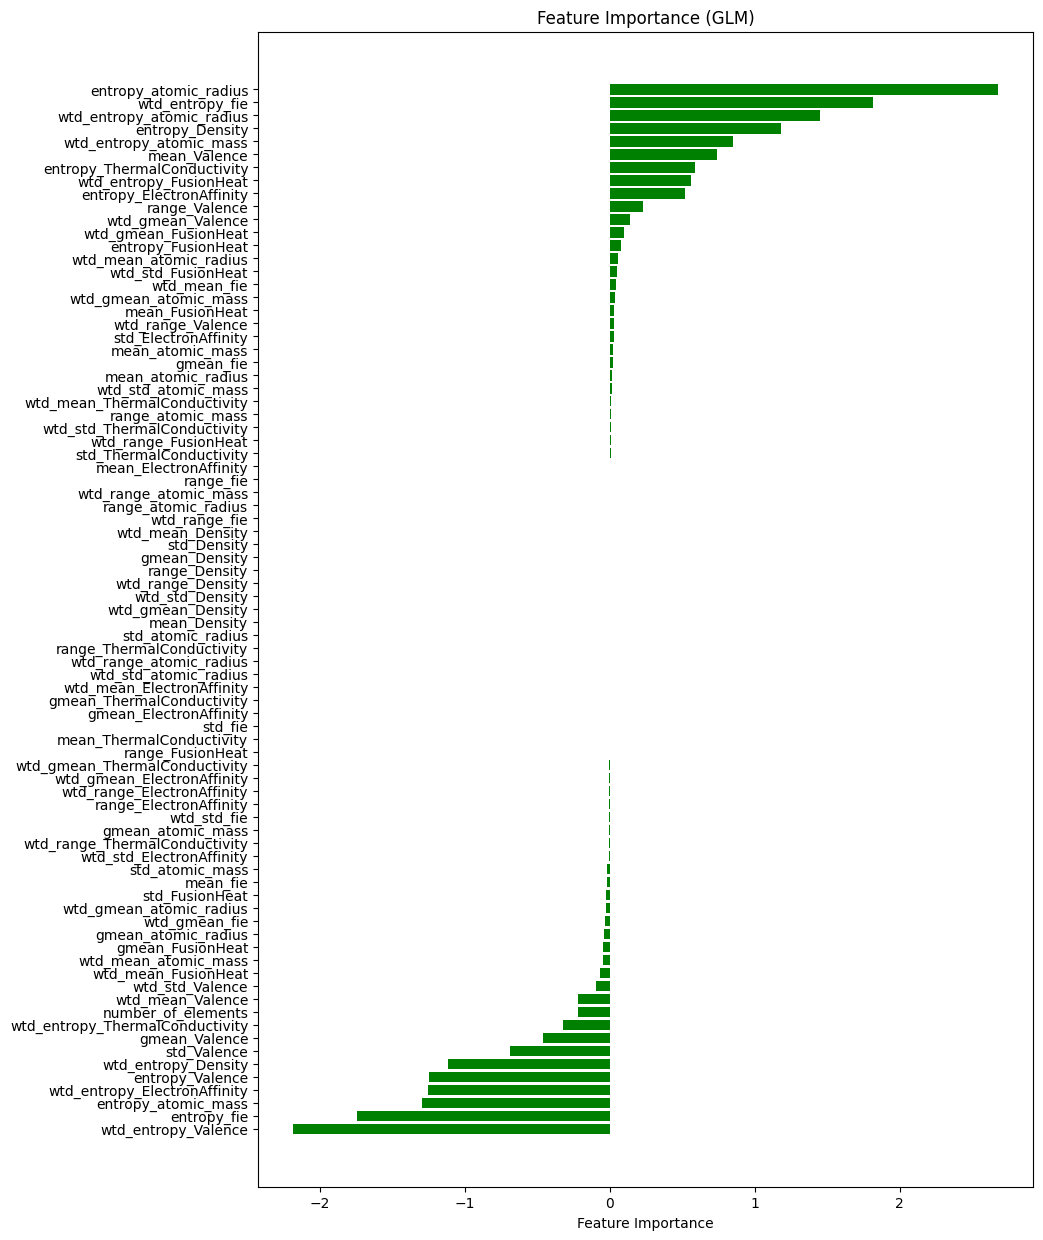

In [482]:
df_glm = pd.DataFrame({
    'Feature': glm.params.index,
    'Feature Importance': np.array(glm.params)
})

df_glm = df_glm.sort_values(by='Feature Importance', ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(df_glm['Feature'], df_glm['Feature Importance'], color="green")
plt.xlabel('Feature Importance')
plt.title('Feature Importance (GLM)')
plt.gca().invert_yaxis() 
plt.show()

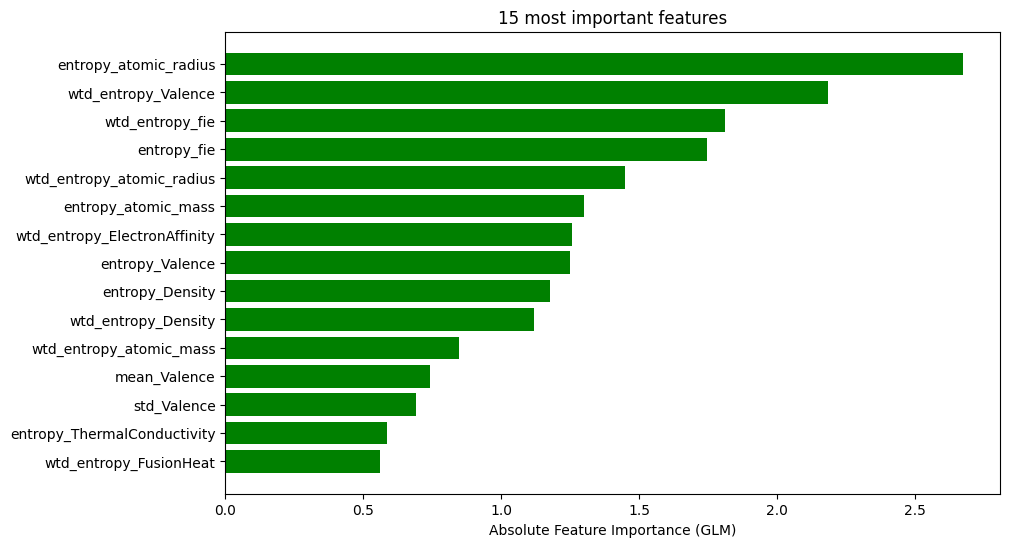

In [483]:
df_glm_abs = pd.DataFrame({
    'Feature': glm.params.index,
    'Feature Importance': np.array(abs(glm.params))
})

df_glm_abs = df_glm_abs.sort_values(by='Feature Importance', ascending=False)
df_glm_abs_15 = df_glm_abs[:15]


plt.figure(figsize=(10, 6))
plt.barh(df_glm_abs_15['Feature'], df_glm_abs_15['Feature Importance'], color="green")
plt.xlabel('Absolute Feature Importance (GLM)')
plt.title('15 most important features')
plt.gca().invert_yaxis() 
plt.show()

* Unlike the OLS model, the GLM highlights Density and Fusion Heat as key predictors. Additionally, Valence and First Ionization Energy (FIE) show an increased influence, while Electron Affinity and Atomic Radius remain significant to the model.

**Generalized Additive Models**

It´s a variation of GLMs that allows the models to learn non-linear relationships, by considering that the outcome can be modeled using a a sum of arbitrary functions of each feature (learned by spline functions).

$$
g(E_y(y|x)) = \beta_0 + \beta_1 f(x_1) + \cdots + \beta_n f(x_n) + \epsilon
$$

TypeError: __init__() got an unexpected keyword argument link_function

***

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>🗃️ References</strong>
    </h3>
</body>
</html>

[2] Numeracy, Maths and Statistics - Academic Skills Kit. https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html. Acesso em 17 de fevereiro de 2025.

[3] https://www.youtube.com/watch?v=ZYAzU7Pnjoo

[4] What Is Ridge Regression? | IBM. 21 de setembro de 2023, https://www.ibm.com/think/topics/ridge-regression.

[5] Luna, Zipporah. “Feature Selection in Machine Learning: Correlation Matrix | Univariate Testing | RFECV”. Geek Culture, 10 de agosto de 2021, https://medium.com/geekculture/feature-selection-in-machine-learning-correlation-matrix-univariate-testing-rfecv-1186168fac12.

[6] “RFECV”. Scikit-Learn, https://scikit-learn/stable/modules/generated/sklearn.feature_selection.RFECV.html. Acesso em 21 de fevereiro de 2025.

[7] “Exponential Family”. Wikipedia, 27 de janeiro de 2025. Wikipedia, https://en.wikipedia.org/w/index.php?title=Exponential_family&oldid=1272267536.

[8] scipy.stats.expon — SciPy v1.15.2 Manual. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html. Acesso em 21 de fevereiro de 2025.

[9] https://www.youtube.com/watch?v=1fZeBafD1nw

[10] Josef Perktold, et al. statsmodels/statsmodels: Release 0.14.2. Zenodo, 17 de abril de 2024. DOI.org (Datacite), https://doi.org/10.5281/ZENODO.593847.

[11] https://stats.stackexchange.com/questions/36064/calculating-r-squared-coefficient-of-determination-with-centered-vs-un-center/37442#37442

[12] SPSS Statistics Subscription - Classic. 30 de setembro de 2024, https://www.ibm.com/docs/fi/spss-statistics/saas?topic=statistics-generalized-linear-models.

[13] “Generalized Additive Model in Python”. GeeksforGeeks, 10 de junho de 2024, https://www.geeksforgeeks.org/generalized-additive-model-in-python/.
